# TODO:

- store output of state vars in xarray-simlab data structure
    1. for gekko solver
    2. for odeint solver
    3. for step-wise solver
    
this needs to be completely wrapped in the backend..
i need to somehow combine the "core.parts" so that they are automatically initialized with the xs.Model

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import xsimlab as xs

# to measure process time
import time as tm

In [2]:
from xsimlab.monitoring import ProgressBar

In [3]:
import os,sys,inspect
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import phydra

phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.OdeintConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert
phydra.core.converters.GekkoConverter.convert


In [4]:
from phydra.processes.main import ModelCore, Solver

In [5]:
Model = phydra.create({'core':ModelCore, 'solver':Solver})

In [6]:
Model

<xsimlab.Model (2 processes, 2 inputs)>
core
    solver_type     [in]
    y_init          [in]
solver

In [7]:
modelsetup = phydra.setup('odeint', Model,
            input_vars={
                'core__y_init':0.5
            },
            output_vars={
                'core__y':None,
            })

In [8]:
modelsetup2 = phydra.setup('stepwise', Model,       
            time=np.arange(0,20,0.01),
            input_vars={
                'core__y_init':0.5
            },
            output_vars={
                'core__y':None,
            })

{'core__y_init': 0.5, 'core__solver_type': 'stepwise'} <class 'dict'>


In [9]:
with ProgressBar(frontend="console"):
        out_ds = modelsetup2.xsimlab.run(model=Model)

▊            8% | run step 165/1999 

initializing model core
SV_SETUP y
assembling model
STEPWISE Model Assembly
defaultdict(None, {'k': Parameter(name='k', value=0.5)})
parameters {'k': 0.5}
fluxes {'y': [<function ModelCore.initialize.<locals>.linear_loss at 0x116287ee0>]}


██████████ 100% | Simulation finished in 00:02 


finalizing: cleanup


In [13]:
out_ds

<xarray.Dataset>
Dimensions:            (time: 2000)
Coordinates:
  * time               (time) float64 0.0 0.01 0.02 0.03 ... 19.97 19.98 19.99
Data variables:
    core__solver_type  <U8 'stepwise'
    core__y            (time) float64 0.5 0.4975 0.495 ... 2.236e-05 2.225e-05
    core__y_init       float64 0.5

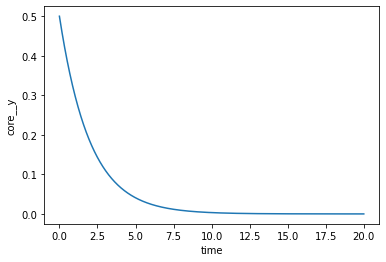

In [14]:
out_ds.core__y.plot()